In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import numpy as np
import matplotlib
import imageio

from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from pytorch_model_summary import summary

In [3]:
#Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(nz, 256),
            nn.LeakyReLU(0.2),consTanh

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, 3072),
            nn.Tanh()
            
        )

    def forward(self, x):
        x = self.main(x).view(x.size(0), 3, 32, 32)
        return x

    
#Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(

            nn.Linear(3072, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), 3*32*32)
        x =  self.main(x)
        return x

In [4]:
#Some parameters
batch_size = 64
epochs = 50
sample_size = 64 
nz = 128 
lr_g = 0.0001
lr_d = 0.0001

# MNIST

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3,1,1)),
    transforms.Normalize(mean=(0.5), std=(0.5))])

#load in full train set
trainsetfull = torchvision.datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transform)
# type(trainsetfull)

# data loader for final run 
trainfullloader = torch.utils.data.DataLoader(trainsetfull, batch_size=batch_size, shuffle=True, num_workers=2)
#split the set 
trainset, valset = torch.utils.data.random_split(trainsetfull, [55000, 5000])
#load in test set
testset = torchvision.datasets.MNIST(root='./data/mnist', train=False, transform=transform,download=True)


# data loader for training
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
# data loader for validation
val_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True)
# data loader for testing
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [6]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

optim_g = optim.Adam(generator.parameters(), lr=lr_g)
optim_d = optim.Adam(discriminator.parameters(), lr_d)

criterion = nn.BCELoss()

In [7]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of trainable parameters in generator:", count_parameters(Generator()))
print("Number of trainable parameters in discriminator:", count_parameters(Discriminator()))

Number of trainable parameters in generator: 1740544
Number of trainable parameters in discriminator: 1704961


In [8]:
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)

def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)
    
def train_discriminator(optimizer, data_real, data_fake):
    b_size = data_real.size(0)
    real_label = label_real(b_size)
    fake_label = label_fake(b_size)

    optimizer.zero_grad()

    output_real = discriminator(data_real)
    loss_real = criterion(output_real, real_label)

    output_fake = discriminator(data_fake)
    loss_fake = criterion(output_fake, fake_label)


    loss_real.backward()
    loss_fake.backward()
    optimizer.step()

    return loss_real + loss_fake

def train_generator(optimizer, data_fake):
    b_size = data_fake.size(0)
    real_label = label_real(b_size)

    optimizer.zero_grad()

    output = discriminator(data_fake)
    loss = criterion(output, real_label)

    loss.backward()
    optimizer.step()

    return loss  

def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

Image for epoch 0
Epoch 0
Image for epoch 1
Epoch 1
Image for epoch 2
Epoch 2
Image for epoch 3
Epoch 3
Image for epoch 4
Epoch 4
Image for epoch 5
Epoch 5
Image for epoch 6
Epoch 6
Image for epoch 7
Epoch 7
Image for epoch 8
Epoch 8
Image for epoch 9
Epoch 9
Image for epoch 10
Epoch 10
Image for epoch 11
Epoch 11
Image for epoch 12
Epoch 12
Image for epoch 13
Epoch 13
Image for epoch 14
Epoch 14
Image for epoch 15
Epoch 15
Image for epoch 16
Epoch 16
Image for epoch 17
Epoch 17
Image for epoch 18
Epoch 18
Image for epoch 19
Epoch 19
Image for epoch 20
Epoch 20


<ipython-input-31-3cb28e170857>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Image for epoch 21
Epoch 21
Image for epoch 22
Epoch 22
Image for epoch 23
Epoch 23
Image for epoch 24
Epoch 24
Image for epoch 25
Epoch 25
Image for epoch 26
Epoch 26
Image for epoch 27
Epoch 27
Image for epoch 28
Epoch 28
Image for epoch 29
Epoch 29
Image for epoch 30
Epoch 30
Image for epoch 31
Epoch 31
Image for epoch 32
Epoch 32
Image for epoch 33
Epoch 33
Image for epoch 34
Epoch 34
Image for epoch 35
Epoch 35
Image for epoch 36
Epoch 36
Image for epoch 37
Epoch 37
Image for epoch 38
Epoch 38
Image for epoch 39
Epoch 39
Image for epoch 40
Epoch 40
Image for epoch 41
Epoch 41
Image for epoch 42
Epoch 42
Image for epoch 43
Epoch 43
Image for epoch 44
Epoch 44
Image for epoch 45
Epoch 45
Image for epoch 46
Epoch 46
Image for epoch 47
Epoch 47
Image for epoch 48
Epoch 48
Image for epoch 49
Epoch 49


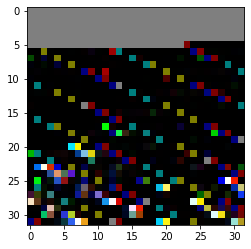

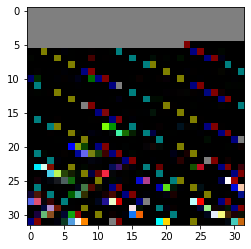

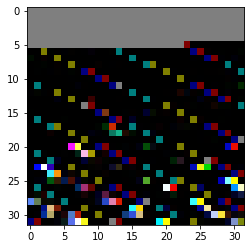

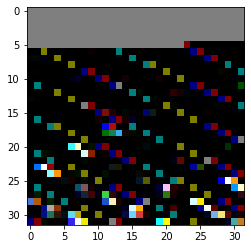

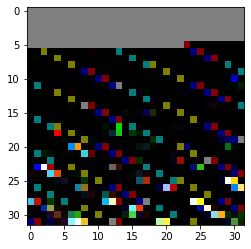

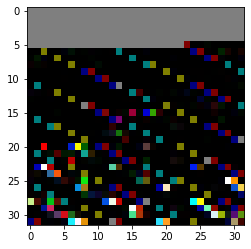

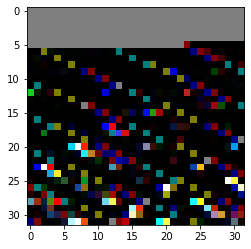

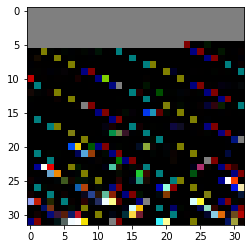

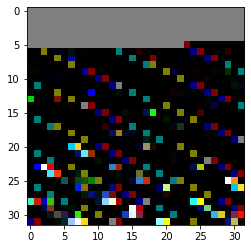

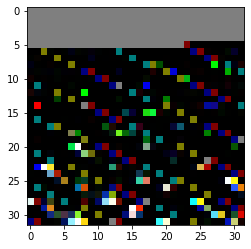

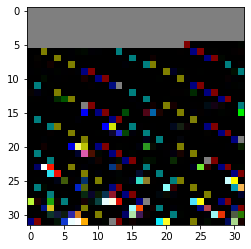

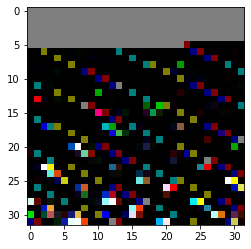

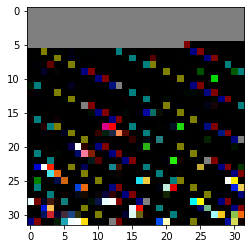

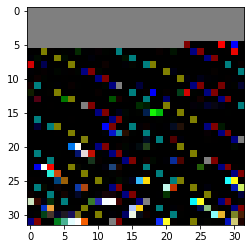

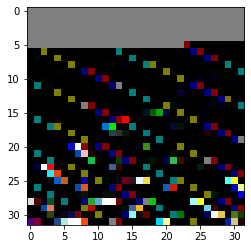

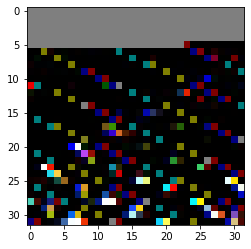

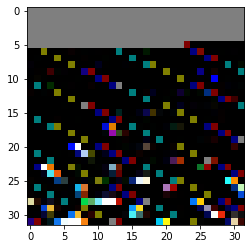

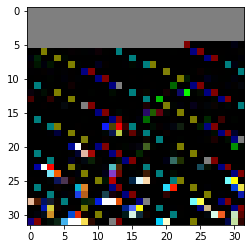

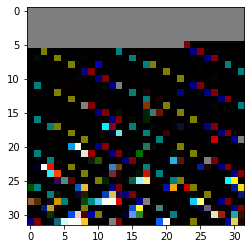

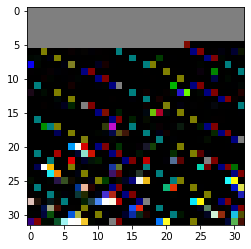

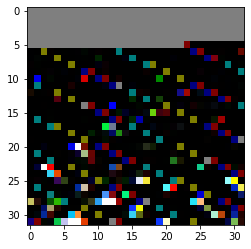

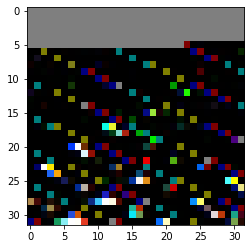

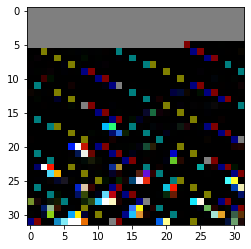

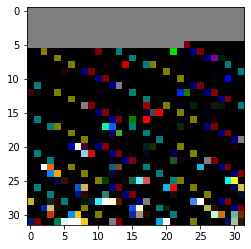

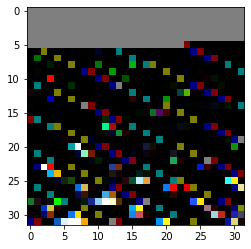

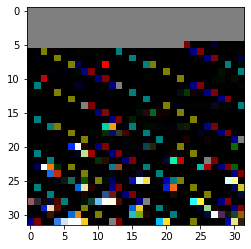

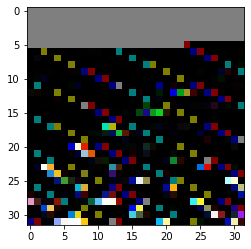

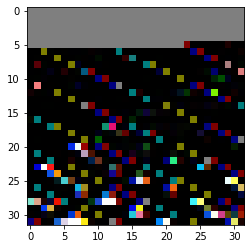

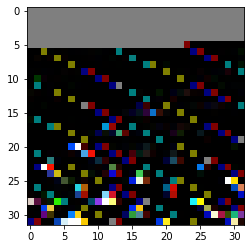

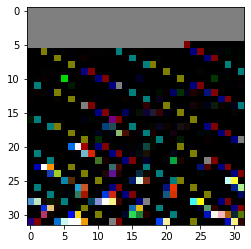

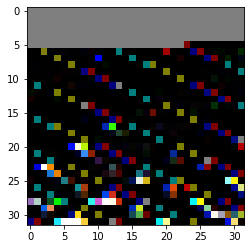

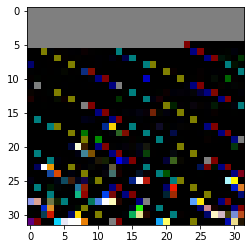

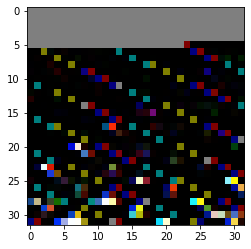

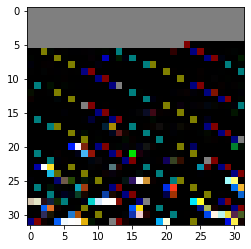

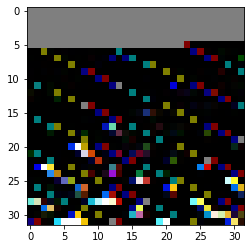

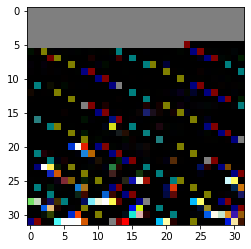

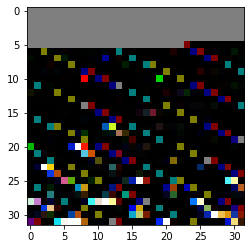

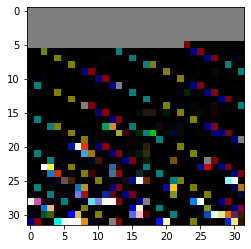

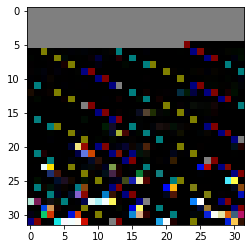

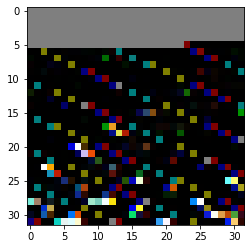

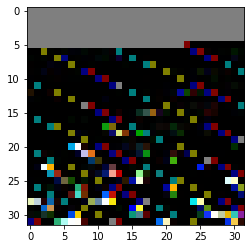

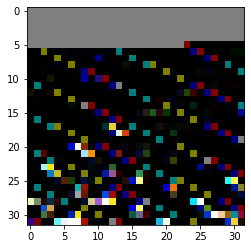

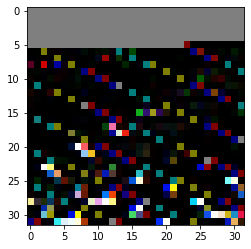

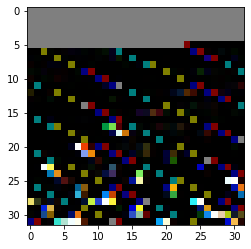

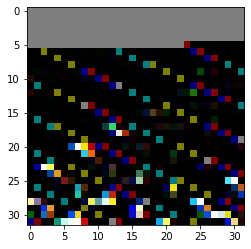

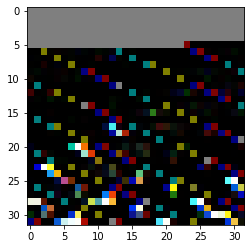

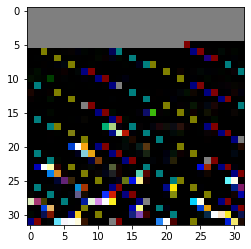

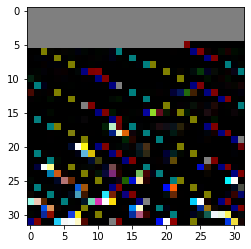

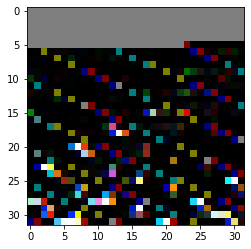

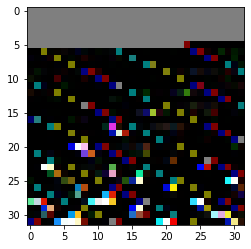

In [31]:
from PIL import Image 
import PIL
from scipy import misc

to_pil_image = transforms.ToPILImage()
noise = torch.randn(sample_size, nz).to(device)

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def process(image, epoch):
    image = np.resize(image, (32, 32, 3))
    image = NormalizeData(image)
    plt.figure()
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.savefig('MNIST image %i.jpg'%epoch)

generator.train()
discriminator.train()

losses_g = [] 
val_losses_g = []
losses_d = [] 
val_losses_d = []
images = [] 

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    val_loss_g = 0.0
    val_loss_d = 0.0
    for i, data in enumerate(train_loader):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(1):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            loss_d += train_discriminator(optim_d, data_real, data_fake)
        data_fake = generator(create_noise(b_size, nz))
        loss_g += train_generator(optim_g, data_fake)
        
    #validation loss
    for i, data in enumerate(val_loader):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(1):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            output_real = discriminator(data_real)
            loss_real = criterion(output_real, real_label)
            output_fake = discriminator(data_fake)
            loss_fake = criterion(output_fake, fake_label)
            val_loss_d += loss_fake + loss_real
        data_fake = generator(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        output = discriminator(data_fake)
        val_loss_g += criterion(output, real_label)

    
    generated_img = generator(noise).cpu().detach()
    generated_img = make_grid(generated_img)

    images.append(generated_img)
    
    print("Image for epoch", epoch)
    process(generated_img, epoch)
    #final_img.save("MNIST image epoch",epoch,".jpg")
    
    
    epoch_loss_g = loss_g / i 
    epoch_loss_d = loss_d / i 
    val_epoch_loss_g = val_loss_g / i 
    val_epoch_loss_d = val_loss_d / i 
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    val_losses_g.append(val_epoch_loss_g)
    val_losses_d.append(val_epoch_loss_d)
    
    print("Epoch", epoch)

In [33]:
images

[tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.0000,  ..., -0.9991,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000, -0.9696,  ..., -0.9792,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.0000,  ..., -1.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000, -0.9113,  ..., -0.9854,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,

In [ ]:
def process(image):
    image = np.resize(image, (28, 28, 1))
    plt.figure()
    plt.imshow(image, cmap='gray')
    
imgs2 = [process(img) for img in images]

# #imgs3 = [np.array(to_pil_image(img)) for img in imgs2]
#imageio.mimsave('outputs/generator_images4.gif', imgs2)

Text(0, 0.5, 'Loss')

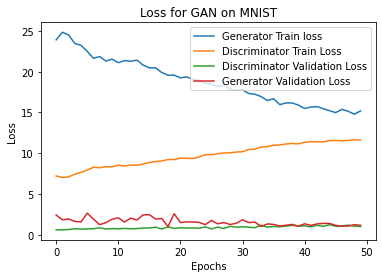

In [32]:
# plot losses
loss_d = [loss.detach().numpy() for loss in losses_d]
loss_g = [loss.detach().numpy() for loss in losses_g]
val_loss_d = [loss.detach().numpy() for loss in val_losses_d]
val_loss_g = [loss.detach().numpy() for loss in val_losses_g]

plt.figure()
plt.plot(loss_g, label='Generator Train loss')
plt.plot(loss_d, label='Discriminator Train Loss')
plt.plot(val_loss_d, label='Discriminator Validation Loss')
plt.plot(val_loss_g, label='Generator Validation Loss')
plt.title("Loss for GAN on MNIST")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
#Plot the images
from skimage.transform import resize

def process(image):
    image = resize(images[-1][-1], (28, 28, 1))
    plt.figure()
    plt.imshow(image, cmap='gray')
    
def process2(image):
    image = resize(images[-1][-1], (32, 32, 3))
    plt.figure()
    plt.imshow(image)

for file in images[-10:]:
    process(file)
    

# imgs = resize(images[-1][-1], (28, 28, 1))
# plt.imshow(imgs,  cmap='gray')
# plt.show()

# SVHN

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: x.repeat(3,1,1)),
    transforms.Normalize(mean=(0.5), std=(0.5))])

#load in full train set
trainsetfull2 = torchvision.datasets.SVHN(root='./data/svhn', split='train', download=True, transform=transform)
print(len(trainsetfull2))

# data loader for final run 
trainfullloader2 = torch.utils.data.DataLoader(trainsetfull2, batch_size=batch_size, shuffle=True)
#split the set 
trainset2, valset2 = torch.utils.data.random_split(trainsetfull2, [65000,8257])
#load in test set
testset2 = torchvision.datasets.SVHN(root='./data/svhn', split='test', transform=transform,download=True)


# data loader for training
train_loader2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size, shuffle=True)
# data loader for validation
val_loader2 = torch.utils.data.DataLoader(valset2, batch_size=batch_size, shuffle=True)
# data loader for testing
test_loader2 = torch.utils.data.DataLoader(testset2, batch_size=batch_size)

Using downloaded and verified file: ./data/svhn/train_32x32.mat
73257
Using downloaded and verified file: ./data/svhn/test_32x32.mat


In [35]:
generator2 = Generator().to(device)
discriminator2 = Discriminator().to(device)

optim_g2 = optim.Adam(generator2.parameters(), lr=lr_g)
optim_d2 = optim.Adam(discriminator2.parameters(), lr=lr_d)

criterion = nn.BCELoss()

In [37]:
def process(image, epoch):
    figname = 'image'
    image = np.resize(image, (32, 32, 3))
    plt.figure()
    plt.imshow(image)
    plt.savefig('SVHN image %i.jpg'%epoch)
    #plt.show()

noise = torch.randn(sample_size, nz).to(device)

generator2.train()
discriminator2.train()

s_losses_g = [] 
s_val_losses_g = []
s_losses_d = [] 
s_val_losses_d = []
s_images = [] 

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    val_loss_g = 0.0
    val_loss_d = 0.0
    for i, data in enumerate(train_loader2):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(1):
            data_fake = generator2(create_noise(b_size, nz)).detach()
            data_real = image
            loss_d += train_discriminator(optim_d2, data_real, data_fake)
        data_fake = generator2(create_noise(b_size, nz))
        loss_g += train_generator(optim_g2, data_fake)
        
    #validation loss
    for i, data in enumerate(val_loader2):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(1):
            data_fake = generator2(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            output_real = discriminator2(data_real)
            loss_real = criterion(output_real, real_label)
            output_fake = discriminator2(data_fake)
            loss_fake = criterion(output_fake, fake_label)
            val_loss_d += loss_fake + loss_real
        data_fake = generator2(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        output = discriminator2(data_fake)
        val_loss_g += criterion(output, real_label)

    generated_img = generator2(noise).cpu().detach()
    generated_img = make_grid(generated_img)

    s_images.append(generated_img)
    epoch_loss_g = loss_g / i 
    epoch_loss_d = loss_d / i 
    val_epoch_loss_g = val_loss_g / i 
    val_epoch_loss_d = val_loss_d / i 
    s_losses_g.append(epoch_loss_g)
    s_losses_d.append(epoch_loss_d)
    s_val_losses_g.append(val_epoch_loss_g)
    s_val_losses_d.append(val_epoch_loss_d)
    
    print("Epoch", epoch)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


Text(0, 0.5, 'Loss')

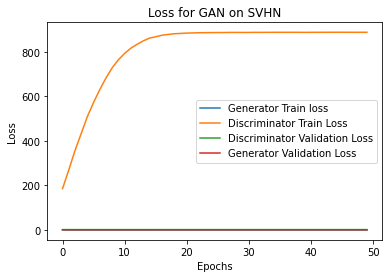

In [38]:
# plot losses
s_loss_d = [loss.detach().numpy() for loss in s_losses_d]
s_loss_g = [loss.detach().numpy() for loss in s_losses_g]
s_val_loss_d = [loss.detach().numpy() for loss in s_val_losses_d]
s_val_loss_g = [loss.detach().numpy() for loss in s_val_losses_g]

plt.figure()
plt.plot(s_loss_g, label='Generator Train loss')
plt.plot(s_loss_d, label='Discriminator Train Loss')
plt.plot(s_val_loss_d, label='Discriminator Validation Loss')
plt.plot(s_val_loss_g, label='Generator Validation Loss')
plt.title("Loss for GAN on SVHN")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

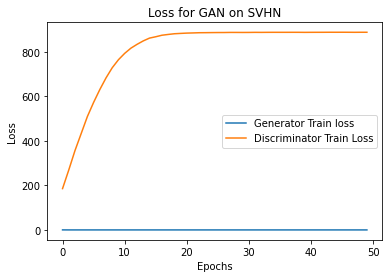

In [39]:
plt.figure()
plt.plot(s_loss_g, label='Generator Train loss')
plt.plot(s_loss_d, label='Discriminator Train Loss')
#plt.plot(s_val_loss_d, label='Discriminator Validation Loss')
#plt.plot(s_val_loss_g, label='Generator Validation Loss')
plt.title("Loss for GAN on SVHN")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")